## keras 모듈의 LSTM Layer를 임포트하지 않는 모델 만들기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/My Drive/LSTM_DL

/content/drive/My Drive/LSTM_DL


In [ ]:
!pip install common
!pip install --upgrade pandas
!pip install --upgrade --force-reinstall xlrd

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for common: filename=common-0.1.2-py3-none-any.whl size=3732 sha256=9a7e108a597dc5f0682bca7ffc851c5ed1e7e7aa3ea73c865cb9f42d895fa415
  Stored in directory: /root/.cache/pip/wheels/11/88/ea/416ddc295a285f3661c88772a64b4a3766a92ce55f7b01dd9d
Successfully built common
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
# road data
data = pd.read_excel('data.xls')

data94 = data[(data['Part Number'] == 'Part 94')]
data95 = data[(data['Part Number'] == 'Part 95')]

# clear data
data94 = data94.loc[:, ['Part Number', 'D일 투입예정 수량(D일계획)', 'D+1일 투입예정 수량(Total)', 'D+2일 투입예정 수량(Total)',
                        'D+3일 투입예정 수량(Total)', 'D+4일 투입예정 수량(Total)', 'D+5일 투입예정 수량', 'D+6일 투입예정 수량',
                        'D+7일 투입예정 수량', 'D+8일 투입예정 수량', 'D+9일 투입예정 수량', 'D+10일 투입예정 수량', 'D+11일 투입예정 수량',
                        'D+12일 투입예정 수량','CRET_TIME']]
data95 = data95.loc[:, ['Part Number', 'D일 투입예정 수량(D일계획)', 'D+1일 투입예정 수량(Total)', 'D+2일 투입예정 수량(Total)',
                        'D+3일 투입예정 수량(Total)', 'D+4일 투입예정 수량(Total)', 'D+5일 투입예정 수량', 'D+6일 투입예정 수량',
                        'D+7일 투입예정 수량', 'D+8일 투입예정 수량', 'D+9일 투입예정 수량', 'D+10일 투입예정 수량', 'D+11일 투입예정 수량',
                        'D+12일 투입예정 수량','CRET_TIME']]

In [ ]:
data94['CRET_TIME'] = pd.to_datetime(data94['CRET_TIME'], format="%Y%m%d%H%M")
data95['CRET_TIME'] = pd.to_datetime(data95['CRET_TIME'], format="%Y%m%d%H%M")

data94 = data94.groupby(by=[data94['CRET_TIME'].dt.year,
data94['CRET_TIME'].dt.month,
data94['CRET_TIME'].dt.day]).last()
data94.reset_index(drop=True, inplace=True)

data95 = data95.groupby(by=[data95['CRET_TIME'].dt.year,
data95['CRET_TIME'].dt.month,
data95['CRET_TIME'].dt.day]).last()
data95.reset_index(drop=True, inplace=True)

Null Data Check

In [ ]:
data94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Part Number          49 non-null     object        
 1   D일 투입예정 수량(D일계획)     49 non-null     int64         
 2   D+1일 투입예정 수량(Total)  49 non-null     int64         
 3   D+2일 투입예정 수량(Total)  49 non-null     int64         
 4   D+3일 투입예정 수량(Total)  49 non-null     int64         
 5   D+4일 투입예정 수량(Total)  49 non-null     int64         
 6   D+5일 투입예정 수량         49 non-null     int64         
 7   D+6일 투입예정 수량         49 non-null     int64         
 8   D+7일 투입예정 수량         49 non-null     int64         
 9   D+8일 투입예정 수량         49 non-null     int64         
 10  D+9일 투입예정 수량         49 non-null     int64         
 11  D+10일 투입예정 수량        49 non-null     int64         
 12  D+11일 투입예정 수량        49 non-null     int64         
 13  D+12일 투입예정 수량        49 non-null     

In [ ]:
data95.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Part Number          49 non-null     object        
 1   D일 투입예정 수량(D일계획)     49 non-null     int64         
 2   D+1일 투입예정 수량(Total)  49 non-null     int64         
 3   D+2일 투입예정 수량(Total)  49 non-null     int64         
 4   D+3일 투입예정 수량(Total)  49 non-null     int64         
 5   D+4일 투입예정 수량(Total)  49 non-null     int64         
 6   D+5일 투입예정 수량         49 non-null     int64         
 7   D+6일 투입예정 수량         49 non-null     int64         
 8   D+7일 투입예정 수량         49 non-null     int64         
 9   D+8일 투입예정 수량         49 non-null     int64         
 10  D+9일 투입예정 수량         49 non-null     int64         
 11  D+10일 투입예정 수량        49 non-null     int64         
 12  D+11일 투입예정 수량        49 non-null     int64         
 13  D+12일 투입예정 수량        49 non-null     

In [ ]:
data94.head()

,Part Number,D일 투입예정 수량(D일계획),D+1일 투입예정 수량(Total),D+2일 투입예정 수량(Total),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+5일 투입예정 수량,D+6일 투입예정 수량,D+7일 투입예정 수량,D+8일 투입예정 수량,D+9일 투입예정 수량,D+10일 투입예정 수량,D+11일 투입예정 수량,D+12일 투입예정 수량,CRET_TIME
0,Part 94,42,32,30,30,30,38,0,30,30,30,30,30,0,2021-09-13 18:30:00
1,Part 94,40,30,30,30,50,45,30,30,30,30,30,0,0,2021-09-14 17:30:00
2,Part 94,40,30,30,47,43,51,0,0,0,30,30,0,30,2021-09-15 16:33:00
3,Part 94,47,30,0,53,42,39,0,0,30,30,0,30,30,2021-09-16 17:06:00
4,Part 94,46,30,30,44,37,51,0,30,30,0,30,30,30,2021-09-17 06:32:00


In [ ]:
data95.head()

,Part Number,D일 투입예정 수량(D일계획),D+1일 투입예정 수량(Total),D+2일 투입예정 수량(Total),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+5일 투입예정 수량,D+6일 투입예정 수량,D+7일 투입예정 수량,D+8일 투입예정 수량,D+9일 투입예정 수량,D+10일 투입예정 수량,D+11일 투입예정 수량,D+12일 투입예정 수량,CRET_TIME
0,Part 95,113,0,274,274,270,251,0,218,78,35,167,277,0,2021-09-13 18:30:00
1,Part 95,209,296,275,276,280,193,204,109,28,158,277,0,0,2021-09-14 17:30:00
2,Part 95,209,267,240,267,340,331,0,0,0,277,249,0,233,2021-09-15 16:33:00
3,Part 95,288,244,0,282,241,267,0,0,277,242,0,242,164,2021-09-16 17:06:00
4,Part 95,276,277,246,320,241,354,0,250,273,0,277,277,215,2021-09-17 06:32:00


# 변수별 상관관계 파악을 위한 데이터 재배열

In [ ]:
corr_data94 = pd.concat([
        data94.iloc[12:, :]['D일 투입예정 수량(D일계획)'].reset_index(drop=True),
        data94.iloc[11:-1, :]['D+1일 투입예정 수량(Total)'].reset_index(drop=True),
        data94.iloc[10:-2, :]['D+2일 투입예정 수량(Total)'].reset_index(drop=True),
        data94.iloc[9:-3, :]['D+3일 투입예정 수량(Total)'].reset_index(drop=True),
        data94.iloc[8:-4, :]['D+4일 투입예정 수량(Total)'].reset_index(drop=True),
        data94.iloc[7:-5, :]['D+5일 투입예정 수량'].reset_index(drop=True),
        data94.iloc[6:-6, :]['D+6일 투입예정 수량'].reset_index(drop=True),
        data94.iloc[5:-7, :]['D+7일 투입예정 수량'].reset_index(drop=True),
        data94.iloc[4:-8, :]['D+8일 투입예정 수량'].reset_index(drop=True),
        data94.iloc[3:-9, :]['D+9일 투입예정 수량'].reset_index(drop=True),
        data94.iloc[2:-10, :]['D+10일 투입예정 수량'].reset_index(drop=True),
        data94.iloc[1:-11, :]['D+11일 투입예정 수량'].reset_index(drop=True),
        data94.iloc[:-12, :]['D+12일 투입예정 수량'].reset_index(drop=True)
        ],
        axis=1)

corr_data95 = pd.concat([
        data95.iloc[12:, :]['D일 투입예정 수량(D일계획)'].reset_index(drop=True),
        data95.iloc[11:-1, :]['D+1일 투입예정 수량(Total)'].reset_index(drop=True),
        data95.iloc[10:-2, :]['D+2일 투입예정 수량(Total)'].reset_index(drop=True),
        data95.iloc[9:-3, :]['D+3일 투입예정 수량(Total)'].reset_index(drop=True),
        data95.iloc[8:-4, :]['D+4일 투입예정 수량(Total)'].reset_index(drop=True),
        data95.iloc[7:-5, :]['D+5일 투입예정 수량'].reset_index(drop=True),
        data95.iloc[6:-6, :]['D+6일 투입예정 수량'].reset_index(drop=True),
        data95.iloc[5:-7, :]['D+7일 투입예정 수량'].reset_index(drop=True),
        data95.iloc[4:-8, :]['D+8일 투입예정 수량'].reset_index(drop=True),
        data95.iloc[3:-9, :]['D+9일 투입예정 수량'].reset_index(drop=True),
        data95.iloc[2:-10, :]['D+10일 투입예정 수량'].reset_index(drop=True),
        data95.iloc[1:-11, :]['D+11일 투입예정 수량'].reset_index(drop=True),
        data95.iloc[:-12, :]['D+12일 투입예정 수량'].reset_index(drop=True)
        ],
        axis=1)

# corr_data 확인

In [ ]:
corr_data94.head()

,D일 투입예정 수량(D일계획),D+1일 투입예정 수량(Total),D+2일 투입예정 수량(Total),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+5일 투입예정 수량,D+6일 투입예정 수량,D+7일 투입예정 수량,D+8일 투입예정 수량,D+9일 투입예정 수량,D+10일 투입예정 수량,D+11일 투입예정 수량,D+12일 투입예정 수량
0,46,30,30,53,51,45,0,30,30,30,30,0,0
1,46,30,30,33,35,37,0,30,30,0,0,0,0
2,40,30,30,38,42,35,0,30,30,0,30,30,30
3,35,30,30,40,36,25,0,30,30,0,30,30,30
4,39,30,30,38,33,33,0,30,30,0,30,30,30


In [ ]:
corr_data95.head()

,D일 투입예정 수량(D일계획),D+1일 투입예정 수량(Total),D+2일 투입예정 수량(Total),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+5일 투입예정 수량,D+6일 투입예정 수량,D+7일 투입예정 수량,D+8일 투입예정 수량,D+9일 투입예정 수량,D+10일 투입예정 수량,D+11일 투입예정 수량,D+12일 투입예정 수량
0,276,277,246,284,182,363,0,250,273,242,249,0,0
1,276,277,246,281,345,314,0,250,273,0,0,0,0
2,262,277,246,293,262,254,0,250,273,0,277,242,233
3,305,276,246,356,372,257,0,250,273,0,277,277,164
4,309,277,277,359,359,210,0,250,273,0,277,277,215


# corr() 메서드를 활용한 표준 상관계수 계산

In [ ]:
corr_data94.corr()

,D일 투입예정 수량(D일계획),D+1일 투입예정 수량(Total),D+2일 투입예정 수량(Total),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+5일 투입예정 수량,D+6일 투입예정 수량,D+7일 투입예정 수량,D+8일 투입예정 수량,D+9일 투입예정 수량,D+10일 투입예정 수량,D+11일 투입예정 수량,D+12일 투입예정 수량
D일 투입예정 수량(D일계획),1.000000,0.651721,0.408578,0.393761,0.136667,0.388251,0.018768,0.127412,0.246102,0.024242,0.215673,0.103277,0.081598
D+1일 투입예정 수량(Total),0.651721,1.000000,0.567057,0.007026,-0.052853,-0.074226,-0.028867,0.114627,0.345470,0.079831,0.286655,0.184163,0.178313
D+2일 투입예정 수량(Total),0.408578,0.567057,1.000000,0.042953,-0.181014,-0.270177,0.043475,0.270970,0.398243,0.102379,0.376835,0.275252,0.280119
D+3일 투입예정 수량(Total),0.393761,0.007026,0.042953,1.000000,0.210142,0.562022,-0.003860,-0.002500,0.073848,0.098664,0.107248,-0.012449,-0.036512
D+4일 투입예정 수량(Total),0.136667,-0.052853,-0.181014,0.210142,1.000000,0.315161,-0.426723,-0.058878,-0.233603,-0.131155,-0.242849,-0.402762,-0.544969
D+5일 투입예정 수량,0.388251,-0.074226,-0.270177,0.562022,0.315161,1.000000,-0.210461,-0.148368,-0.077522,-0.117067,-0.141054,-0.211434,-0.185081
D+6일 투입예정 수량,0.018768,-0.028867,0.043475,-0.003860,-0.426723,-0.210461,1.000000,0.287892,0.110128,0.509635,0.125197,0.142901,0.247596
D+7일 투입예정 수량,0.127412,0.114627,0.270970,-0.002500,-0.058878,-0.148368,0.287892,1.000000,0.351789,0.296777,0.261273,0.230464,0.036519
D+8일 투입예정 수량,0.246102,0.345470,0.398243,0.073848,-0.233603,-0.077522,0.110128,0.351789,1.000000,0.473771,0.667105,0.555358,0.532574
D+9일 투입예정 수량,0.024242,0.079831,0.102379,0.098664,-0.131155,-0.117067,0.509635,0.296777,0.473771,1.000000,0.479412,0.328968,0.360938


In [ ]:
corr_data95.corr()

,D일 투입예정 수량(D일계획),D+1일 투입예정 수량(Total),D+2일 투입예정 수량(Total),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+5일 투입예정 수량,D+6일 투입예정 수량,D+7일 투입예정 수량,D+8일 투입예정 수량,D+9일 투입예정 수량,D+10일 투입예정 수량,D+11일 투입예정 수량,D+12일 투입예정 수량
D일 투입예정 수량(D일계획),1.000000,0.108182,0.282023,0.459098,0.588721,0.519861,0.273052,0.391718,-0.135856,-0.306075,0.108452,0.103563,0.180392
D+1일 투입예정 수량(Total),0.108182,1.000000,0.580337,0.086071,0.116235,-0.028615,0.024452,0.351023,0.282820,0.110759,0.226157,0.189191,0.117969
D+2일 투입예정 수량(Total),0.282023,0.580337,1.000000,0.056062,0.098910,-0.055059,0.206152,0.402564,0.258198,-0.035627,0.264216,0.354206,0.259708
D+3일 투입예정 수량(Total),0.459098,0.086071,0.056062,1.000000,0.477930,0.511720,0.189599,0.143296,0.042130,-0.074928,0.041461,-0.023950,0.175459
D+4일 투입예정 수량(Total),0.588721,0.116235,0.098910,0.477930,1.000000,0.470868,-0.110604,0.150045,-0.153121,-0.471869,0.140618,-0.008605,0.166442
D+5일 투입예정 수량,0.519861,-0.028615,-0.055059,0.511720,0.470868,1.000000,-0.032663,0.094639,-0.071569,-0.164729,0.025040,-0.127311,0.105947
D+6일 투입예정 수량,0.273052,0.024452,0.206152,0.189599,-0.110604,-0.032663,1.000000,0.196957,-0.258092,0.216809,-0.092831,0.149900,0.125092
D+7일 투입예정 수량,0.391718,0.351023,0.402564,0.143296,0.150045,0.094639,0.196957,1.000000,0.165481,0.053256,0.138407,0.270340,-0.036326
D+8일 투입예정 수량,-0.135856,0.282820,0.258198,0.042130,-0.153121,-0.071569,-0.258092,0.165481,1.000000,0.258905,0.464095,0.484563,0.273060
D+9일 투입예정 수량,-0.306075,0.110759,-0.035627,-0.074928,-0.471869,-0.164729,0.216809,0.053256,0.258905,1.000000,-0.067575,0.056114,-0.140508


# - 당일 발주 수량과 가장 유의미한 관계가 있는 변수로 D+3, D+4, D+5일의 투입 예정 수량을 최종 선택
# - D+3 ~ D+5 colum만을 추출하여 데이터 재배열

In [ ]:
data94 = data94.loc[:, ['D일 투입예정 수량(D일계획)',
                  'D+3일 투입예정 수량(Total)',
                  'D+4일 투입예정 수량(Total)',
                  'D+5일 투입예정 수량'
                  ]].reset_index(drop=True)
data94.head()

,D일 투입예정 수량(D일계획),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+5일 투입예정 수량
0,42,30,30,38
1,40,30,50,45
2,40,47,43,51
3,47,53,42,39
4,46,44,37,51


In [ ]:
data95 = data95.loc[:, ['D일 투입예정 수량(D일계획)',
                  'D+3일 투입예정 수량(Total)',
                  'D+4일 투입예정 수량(Total)',
                  'D+5일 투입예정 수량'
                  ]].reset_index(drop=True)
data95.head()

,D일 투입예정 수량(D일계획),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+5일 투입예정 수량
0,113,274,270,251
1,209,276,280,193
2,209,267,340,331
3,288,282,241,267
4,276,320,241,354


# 사용자 정의 함수인 ‘to_timeseries_data’를 만들어 기존 데이터 입력 시 시계열 형태의 데이터로 변환

In [ ]:
def to_timeseries_data(data, lookback=3, delay=3):
    # data는 원본 tabular 데이터
    # lookback: 입력으로 사용하기 위해 거슬러 올라갈 시간단위의 개수=3일전
    # delay: target으로 사용할 미래의 시점=3일후
    output_len = len(data)-(lookback+delay)+1 # N=total_length-(3+3)+1
    n_feature = data.shape[-1] # =4
    
    inputs = np.zeros((output_len, lookback, n_feature)) # (N,3,4)
    targets = np.zeros((output_len,)) # (N,)
    
    for i in range(output_len):
        inputs[i] = data.iloc[i:i+lookback, :]
        targets[i] = data.iloc[i+lookback+delay-1, 0]
       
    return inputs, targets
# 사용자 정의 함수 적용
X_94, y_94 = to_timeseries_data(data94)
print("X의 형태: ", X_94.shape)
print("y의 형태: ", y_94.shape)
print("\n")
X_95, y_95 = to_timeseries_data(data95)
print("X의 형태: ", X_95.shape)
print("y의 형태: ", y_95.shape)

X의 형태:  (44, 3, 4)
y의 형태:  (44,)


X의 형태:  (44, 3, 4)
y의 형태:  (44,)


In [ ]:
# 데이터셋 분리, train:validation:test = 7:1:2
X_train_94, X_val_94, X_test_94 = np.split(X_94, [int(0.7*len(X_94)), int(0.8*len(X_94))])
y_train_94, y_val_94, y_test_94 = np.split(y_94, [int(0.7*len(y_94)), int(0.8*len(y_94))])
# 분리 이후 데이터 형태
print("X 학습: {}, X 검증: {}, X 평가: {}".format(X_train_94.shape,X_val_94.shape,X_test_94.shape))
print("y 학습: {}, y 검증: {}, y 평가: {}".format(y_train_94.shape,y_val_94.shape,y_test_94.shape))

# 데이터셋 분리, train:validation:test = 7:1:2
X_train_95, X_val_95, X_test_95 = np.split(X_95, [int(0.7*len(X_95)), int(0.8*len(X_95))])
y_train_95, y_val_95, y_test_95 = np.split(y_95, [int(0.7*len(y_95)), int(0.8*len(y_95))])
# 분리 이후 데이터 형태
print("X 학습: {}, X 검증: {}, X 평가: {}".format(X_train_95.shape,X_val_95.shape,X_test_95.shape))
print("y 학습: {}, y 검증: {}, y 평가: {}".format(y_train_95.shape,y_val_95.shape,y_test_95.shape))


X 학습: (30, 3, 4), X 검증: (5, 3, 4), X 평가: (9, 3, 4)
y 학습: (30,), y 검증: (5,), y 평가: (9,)
X 학습: (30, 3, 4), X 검증: (5, 3, 4), X 평가: (9, 3, 4)
y 학습: (30,), y 검증: (5,), y 평가: (9,)


In [ ]:
# 전처리시 필요한 패키지 불러오기
from sklearn.preprocessing import StandardScaler
Xscaler_94 = StandardScaler()
X_train_94 = Xscaler_94.fit_transform(X_train_94.reshape(-1, X_train_94.shape[-1])).reshape(X_train_94.shape)
X_val_94 = Xscaler_94.transform(X_val_94.reshape(-1, X_val_94.shape[-1])).reshape(X_val_94.shape)
X_test_94 = Xscaler_94.transform(X_test_94.reshape(-1, X_test_94.shape[-1])).reshape(X_test_94.shape)
yscaler_94 = StandardScaler()
y_train_94 = yscaler_94.fit_transform(y_train_94.reshape(-1,1))
y_val_94 = yscaler_94.transform(y_val_94.reshape(-1,1))
y_test_94 = yscaler_94.transform(y_test_94.reshape(-1,1))

# LSTM Model Definition

In [ ]:
#!pip uninstall tensorflow -y
#!pip install tensorflow==2.10.0

In [ ]:
import uuid
import tensorflow as tf

from keras import activations
from keras import backend
from keras import constraints
from keras import initializers
from keras import regularizers
from keras.engine import base_layer
#from keras.engine.input_spec import InputSpec
from keras.engine.input_spec import InputSpec
from keras.layers.rnn import gru_lstm_utils
from keras.layers.rnn import rnn_utils
from keras.layers.rnn import RNN
# from keras.layers.rnn.dropout_rnn_cell_mixin import DropoutRNNCellMixin
from keras.utils import tf_utils
from keras.layers.rnn.dropout_rnn_cell_mixin import DropoutRNNCellMixin

# isort: off
from tensorflow.python.platform import tf_logging as logging
from tensorflow.python.util.tf_export import keras_export

In [ ]:
class LSTMCell(DropoutRNNCellMixin, base_layer.BaseRandomLayer):
    """Cell class for the LSTM layer.
    See [the Keras RNN API guide](https://www.tensorflow.org/guide/keras/rnn)
    for details about the usage of RNN API.
    This class processes one step within the whole time sequence input, whereas
    `tf.keras.layer.LSTM` processes the whole sequence.
    For example:
    >>> inputs = tf.random.normal([32, 10, 8])
    >>> rnn = tf.keras.layers.RNN(tf.keras.layers.LSTMCell(4))
    >>> output = rnn(inputs)
    >>> print(output.shape)
    (32, 4)
    >>> rnn = tf.keras.layers.RNN(
    ...    tf.keras.layers.LSTMCell(4),
    ...    return_sequences=True,
    ...    return_state=True)
    >>> whole_seq_output, final_memory_state, final_carry_state = rnn(inputs)
    >>> print(whole_seq_output.shape)
    (32, 10, 4)
    >>> print(final_memory_state.shape)
    (32, 4)
    >>> print(final_carry_state.shape)
    (32, 4)
    Args:
      units: Positive integer, dimensionality of the output space.
      activation: Activation function to use. Default: hyperbolic tangent
        (`tanh`). If you pass `None`, no activation is applied (ie. "linear"
        activation: `a(x) = x`).
      recurrent_activation: Activation function to use for the recurrent step.
        Default: sigmoid (`sigmoid`). If you pass `None`, no activation is
        applied (ie. "linear" activation: `a(x) = x`).
      use_bias: Boolean, (default `True`), whether the layer uses a bias vector.
      kernel_initializer: Initializer for the `kernel` weights matrix, used for
        the linear transformation of the inputs. Default: `glorot_uniform`.
      recurrent_initializer: Initializer for the `recurrent_kernel` weights
        matrix, used for the linear transformation of the recurrent state.
        Default: `orthogonal`.
      bias_initializer: Initializer for the bias vector. Default: `zeros`.
      unit_forget_bias: Boolean (default `True`). If True, add 1 to the bias of
        the forget gate at initialization. Setting it to true will also force
        `bias_initializer="zeros"`. This is recommended in [Jozefowicz et
          al.](http://www.jmlr.org/proceedings/papers/v37/jozefowicz15.pdf)
      kernel_regularizer: Regularizer function applied to the `kernel` weights
        matrix. Default: `None`.
      recurrent_regularizer: Regularizer function applied to
        the `recurrent_kernel` weights matrix. Default: `None`.
      bias_regularizer: Regularizer function applied to the bias vector.
        Default: `None`.
      kernel_constraint: Constraint function applied to the `kernel` weights
        matrix. Default: `None`.
      recurrent_constraint: Constraint function applied to the
        `recurrent_kernel` weights matrix. Default: `None`.
      bias_constraint: Constraint function applied to the bias vector. Default:
        `None`.
      dropout: Float between 0 and 1. Fraction of the units to drop for the
        linear transformation of the inputs. Default: 0.
      recurrent_dropout: Float between 0 and 1. Fraction of the units to drop
        for the linear transformation of the recurrent state. Default: 0.
    Call arguments:
      inputs: A 2D tensor, with shape of `[batch, feature]`.
      states: List of 2 tensors that corresponding to the cell's units. Both of
        them have shape `[batch, units]`, the first tensor is the memory state
        from previous time step, the second tensor is the carry state from
        previous time step. For timestep 0, the initial state provided by user
        will be feed to cell.
      training: Python boolean indicating whether the layer should behave in
        training mode or in inference mode. Only relevant when `dropout` or
        `recurrent_dropout` is used.
    """

    def __init__(
        self,
        units,
        activation="tanh",
        recurrent_activation="sigmoid",
        use_bias=True,
        kernel_initializer="glorot_uniform",
        recurrent_initializer="orthogonal",
        bias_initializer="zeros",
        unit_forget_bias=True,
        kernel_regularizer=None,
        recurrent_regularizer=None,
        bias_regularizer=None,
        kernel_constraint=None,
        recurrent_constraint=None,
        bias_constraint=None,
        dropout=0.0,
        recurrent_dropout=0.0,
        **kwargs,
    ):
        if units < 0:
            raise ValueError(
                f"Received an invalid value for argument `units`, "
                f"expected a positive integer, got {units}."
            )
        # By default use cached variable under v2 mode, see b/143699808.
        if tf.compat.v1.executing_eagerly_outside_functions():
            self._enable_caching_device = kwargs.pop(
                "enable_caching_device", True
            )
        else:
            self._enable_caching_device = kwargs.pop(
                "enable_caching_device", False
            )
        super().__init__(**kwargs)
        self.units = units
        self.activation = activations.get(activation)
        self.recurrent_activation = activations.get(recurrent_activation)
        self.use_bias = use_bias

        self.kernel_initializer = initializers.get(kernel_initializer)
        self.recurrent_initializer = initializers.get(recurrent_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.unit_forget_bias = unit_forget_bias

        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.recurrent_regularizer = regularizers.get(recurrent_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)

        self.kernel_constraint = constraints.get(kernel_constraint)
        self.recurrent_constraint = constraints.get(recurrent_constraint)
        self.bias_constraint = constraints.get(bias_constraint)

        self.dropout = min(1.0, max(0.0, dropout))
        self.recurrent_dropout = min(1.0, max(0.0, recurrent_dropout))
        implementation = kwargs.pop("implementation", 2)
        if self.recurrent_dropout != 0 and implementation != 1:
            logging.debug(RECURRENT_DROPOUT_WARNING_MSG)
            self.implementation = 1
        else:
            self.implementation = implementation
        self.state_size = [self.units, self.units]
        self.output_size = self.units

    @tf_utils.shape_type_conversion
    def build(self, input_shape):
        super().build(input_shape)
        default_caching_device = rnn_utils.caching_device(self)
        input_dim = input_shape[-1]
        self.kernel = self.add_weight(
            shape=(input_dim, self.units * 4),
            name="kernel",
            initializer=self.kernel_initializer,
            regularizer=self.kernel_regularizer,
            constraint=self.kernel_constraint,
            caching_device=default_caching_device,
        )
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units * 4),
            name="recurrent_kernel",
            initializer=self.recurrent_initializer,
            regularizer=self.recurrent_regularizer,
            constraint=self.recurrent_constraint,
            caching_device=default_caching_device,
        )

        if self.use_bias:
            if self.unit_forget_bias:

                def bias_initializer(_, *args, **kwargs):
                    return backend.concatenate(
                        [
                            self.bias_initializer(
                                (self.units,), *args, **kwargs
                            ),
                            initializers.get("ones")(
                                (self.units,), *args, **kwargs
                            ),
                            self.bias_initializer(
                                (self.units * 2,), *args, **kwargs
                            ),
                        ]
                    )

            else:
                bias_initializer = self.bias_initializer
            self.bias = self.add_weight(
                shape=(self.units * 4,),
                name="bias",
                initializer=bias_initializer,
                regularizer=self.bias_regularizer,
                constraint=self.bias_constraint,
                caching_device=default_caching_device,
            )
        else:
            self.bias = None
        self.built = True

    def _compute_carry_and_output(self, x, h_tm1, c_tm1):
        """Computes carry and output using split kernels."""
        x_i, x_f, x_c, x_o = x
        h_tm1_i, h_tm1_f, h_tm1_c, h_tm1_o = h_tm1
        i = self.recurrent_activation(
            x_i + backend.dot(h_tm1_i, self.recurrent_kernel[:, : self.units])
        )
        f = self.recurrent_activation(
            x_f
            + backend.dot(
                h_tm1_f, self.recurrent_kernel[:, self.units : self.units * 2]
            )
        )
        c = f * c_tm1 + i * self.activation(
            x_c
            + backend.dot(
                h_tm1_c,
                self.recurrent_kernel[:, self.units * 2 : self.units * 3],
            )
        )
        o = self.recurrent_activation(
            x_o
            + backend.dot(h_tm1_o, self.recurrent_kernel[:, self.units * 3 :])
        )
        return c, o

    def _compute_carry_and_output_fused(self, z, c_tm1):
        """Computes carry and output using fused kernels."""
        z0, z1, z2, z3 = z
        i = self.recurrent_activation(z0)
        f = self.recurrent_activation(z1)
        c = f * c_tm1 + i * self.activation(z2)
        o = self.recurrent_activation(z3)
        return c, o

    def call(self, inputs, states, training=None):
        h_tm1 = states[0]  # previous memory state
        c_tm1 = states[1]  # previous carry state

        dp_mask = self.get_dropout_mask_for_cell(inputs, training, count=4)
        rec_dp_mask = self.get_recurrent_dropout_mask_for_cell(
            h_tm1, training, count=4
        )

        if self.implementation == 1:
            if 0 < self.dropout < 1.0:
                inputs_i = inputs * dp_mask[0]
                inputs_f = inputs * dp_mask[1]
                inputs_c = inputs * dp_mask[2]
                inputs_o = inputs * dp_mask[3]
            else:
                inputs_i = inputs
                inputs_f = inputs
                inputs_c = inputs
                inputs_o = inputs
            k_i, k_f, k_c, k_o = tf.split(
                self.kernel, num_or_size_splits=4, axis=1
            )
            x_i = backend.dot(inputs_i, k_i)
            x_f = backend.dot(inputs_f, k_f)
            x_c = backend.dot(inputs_c, k_c)
            x_o = backend.dot(inputs_o, k_o)
            if self.use_bias:
                b_i, b_f, b_c, b_o = tf.split(
                    self.bias, num_or_size_splits=4, axis=0
                )
                x_i = backend.bias_add(x_i, b_i)
                x_f = backend.bias_add(x_f, b_f)
                x_c = backend.bias_add(x_c, b_c)
                x_o = backend.bias_add(x_o, b_o)

            if 0 < self.recurrent_dropout < 1.0:
                h_tm1_i = h_tm1 * rec_dp_mask[0]
                h_tm1_f = h_tm1 * rec_dp_mask[1]
                h_tm1_c = h_tm1 * rec_dp_mask[2]
                h_tm1_o = h_tm1 * rec_dp_mask[3]
            else:
                h_tm1_i = h_tm1
                h_tm1_f = h_tm1
                h_tm1_c = h_tm1
                h_tm1_o = h_tm1
            x = (x_i, x_f, x_c, x_o)
            h_tm1 = (h_tm1_i, h_tm1_f, h_tm1_c, h_tm1_o)
            c, o = self._compute_carry_and_output(x, h_tm1, c_tm1)
        else:
            if 0.0 < self.dropout < 1.0:
                inputs = inputs * dp_mask[0]
            z = backend.dot(inputs, self.kernel)
            z += backend.dot(h_tm1, self.recurrent_kernel)
            if self.use_bias:
                z = backend.bias_add(z, self.bias)

            z = tf.split(z, num_or_size_splits=4, axis=1)
            c, o = self._compute_carry_and_output_fused(z, c_tm1)

        h = o * self.activation(c)
        return h, [h, c]

    def get_config(self):
        config = {
            "units": self.units,
            "activation": activations.serialize(self.activation),
            "recurrent_activation": activations.serialize(
                self.recurrent_activation
            ),
            "use_bias": self.use_bias,
            "kernel_initializer": initializers.serialize(
                self.kernel_initializer
            ),
            "recurrent_initializer": initializers.serialize(
                self.recurrent_initializer
            ),
            "bias_initializer": initializers.serialize(self.bias_initializer),
            "unit_forget_bias": self.unit_forget_bias,
            "kernel_regularizer": regularizers.serialize(
                self.kernel_regularizer
            ),
            "recurrent_regularizer": regularizers.serialize(
                self.recurrent_regularizer
            ),
            "bias_regularizer": regularizers.serialize(self.bias_regularizer),
            "kernel_constraint": constraints.serialize(self.kernel_constraint),
            "recurrent_constraint": constraints.serialize(
                self.recurrent_constraint
            ),
            "bias_constraint": constraints.serialize(self.bias_constraint),
            "dropout": self.dropout,
            "recurrent_dropout": self.recurrent_dropout,
            "implementation": self.implementation,
        }
        config.update(rnn_utils.config_for_enable_caching_device(self))
        base_config = super().get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        return list(
            rnn_utils.generate_zero_filled_state_for_cell(
                self, inputs, batch_size, dtype
            )
        )

In [ ]:
class LSTM(DropoutRNNCellMixin, RNN, base_layer.BaseRandomLayer):
    def __init__(
        self,
        units,
        activation="tanh",
        recurrent_activation="sigmoid",
        use_bias=True,
        kernel_initializer="glorot_uniform",
        recurrent_initializer="orthogonal",
        bias_initializer="zeros",
        unit_forget_bias=True,
        kernel_regularizer=None,
        recurrent_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        recurrent_constraint=None,
        bias_constraint=None,
        dropout=0.0,
        recurrent_dropout=0.0,
        return_sequences=False,
        return_state=False,
        go_backwards=False,
        stateful=False,
        time_major=False,
        unroll=False,
        **kwargs,
    ):
        # return_runtime is a flag for testing, which shows the real backend
        # implementation chosen by grappler in graph mode.
        self.return_runtime = kwargs.pop("return_runtime", False)
        implementation = kwargs.pop("implementation", 2)
        if implementation == 0:
            logging.warning(
                "`implementation=0` has been deprecated, "
                "and now defaults to `implementation=1`."
                "Please update your layer call."
            )
        if "enable_caching_device" in kwargs:
            cell_kwargs = {
                "enable_caching_device": kwargs.pop("enable_caching_device")
            }
        else:
            cell_kwargs = {}
        cell = LSTMCell(
            units,
            activation=activation,
            recurrent_activation=recurrent_activation,
            use_bias=use_bias,
            kernel_initializer=kernel_initializer,
            recurrent_initializer=recurrent_initializer,
            unit_forget_bias=unit_forget_bias,
            bias_initializer=bias_initializer,
            kernel_regularizer=kernel_regularizer,
            recurrent_regularizer=recurrent_regularizer,
            bias_regularizer=bias_regularizer,
            kernel_constraint=kernel_constraint,
            recurrent_constraint=recurrent_constraint,
            bias_constraint=bias_constraint,
            dropout=dropout,
            recurrent_dropout=recurrent_dropout,
            implementation=implementation,
            dtype=kwargs.get("dtype"),
            trainable=kwargs.get("trainable", True),
            **cell_kwargs,
        )
        super().__init__(
            cell,
            return_sequences=return_sequences,
            return_state=return_state,
            go_backwards=go_backwards,
            stateful=stateful,
            time_major=time_major,
            unroll=unroll,
            **kwargs,
        )
        self.activity_regularizer = regularizers.get(activity_regularizer)
        self.input_spec = [InputSpec(ndim=3)]
        self.state_spec = [
            InputSpec(shape=(None, dim)) for dim in (self.units, self.units)
        ]
        self._could_use_gpu_kernel = (
            self.activation in (activations.tanh, tf.tanh)
            and self.recurrent_activation in (activations.sigmoid, tf.sigmoid)
            and recurrent_dropout == 0
            and not unroll
            and use_bias
            and tf.compat.v1.executing_eagerly_outside_functions()
        )
        if tf.config.list_logical_devices("GPU"):
            # Only show the message when there is GPU available, user will not
            # care about the cuDNN if there isn't any GPU.
            if self._could_use_gpu_kernel:
                logging.debug(gru_lstm_utils.CUDNN_AVAILABLE_MSG % self.name)
            else:
                logging.warning(
                    gru_lstm_utils.CUDNN_NOT_AVAILABLE_MSG % self.name
                )

        if gru_lstm_utils.use_new_gru_lstm_impl():
            self._defun_wrapper = gru_lstm_utils.DefunWrapper(
                time_major, go_backwards, "lstm"
            )

    def call(self, inputs, mask=None, training=None, initial_state=None):
        # The input should be dense, padded with zeros. If a ragged input is fed
        # into the layer, it is padded and the row lengths are used for masking.
        inputs, row_lengths = backend.convert_inputs_if_ragged(inputs)
        is_ragged_input = row_lengths is not None
        self._validate_args_if_ragged(is_ragged_input, mask)

        # LSTM does not support constants. Ignore it during process.
        inputs, initial_state, _ = self._process_inputs(
            inputs, initial_state, None
        )

        if isinstance(mask, list):
            mask = mask[0]

        input_shape = backend.int_shape(inputs)
        timesteps = input_shape[0] if self.time_major else input_shape[1]

        if not self._could_use_gpu_kernel:
            # Fall back to use the normal LSTM.
            kwargs = {"training": training}
            self._maybe_reset_cell_dropout_mask(self.cell)

            def step(inputs, states):
                return self.cell(inputs, states, **kwargs)

            last_output, outputs, states = backend.rnn(
                step,
                inputs,
                initial_state,
                constants=None,
                go_backwards=self.go_backwards,
                mask=mask,
                unroll=self.unroll,
                input_length=row_lengths
                if row_lengths is not None
                else timesteps,
                time_major=self.time_major,
                zero_output_for_mask=self.zero_output_for_mask,
                return_all_outputs=self.return_sequences,
            )
            runtime = gru_lstm_utils.runtime(gru_lstm_utils.RUNTIME_UNKNOWN)
        else:
            # Use the new defun approach for backend implementation swap.
            # Note that different implementations need to have same function
            # signature, eg, the tensor parameters need to have same shape and
            # dtypes. Since the cuDNN has an extra set of bias, those bias will
            # be passed to both normal and cuDNN implementations.
            self.reset_dropout_mask()
            dropout_mask = self.get_dropout_mask_for_cell(
                inputs, training, count=4
            )
            if dropout_mask is not None:
                inputs = inputs * dropout_mask[0]
            if gru_lstm_utils.use_new_gru_lstm_impl():
                lstm_kwargs = {
                    "inputs": inputs,
                    "init_h": gru_lstm_utils.read_variable_value(
                        initial_state[0]
                    ),
                    "init_c": gru_lstm_utils.read_variable_value(
                        initial_state[1]
                    ),
                    "kernel": gru_lstm_utils.read_variable_value(
                        self.cell.kernel
                    ),
                    "recurrent_kernel": gru_lstm_utils.read_variable_value(
                        self.cell.recurrent_kernel
                    ),
                    "bias": gru_lstm_utils.read_variable_value(self.cell.bias),
                    "mask": mask,
                    "time_major": self.time_major,
                    "go_backwards": self.go_backwards,
                    "sequence_lengths": row_lengths,
                    "zero_output_for_mask": self.zero_output_for_mask,
                }
                (
                    last_output,
                    outputs,
                    new_h,
                    new_c,
                    runtime,
                ) = self._defun_wrapper.defun_layer(**lstm_kwargs)
            else:
                gpu_lstm_kwargs = {
                    "inputs": inputs,
                    "init_h": gru_lstm_utils.read_variable_value(
                        initial_state[0]
                    ),
                    "init_c": gru_lstm_utils.read_variable_value(
                        initial_state[1]
                    ),
                    "kernel": gru_lstm_utils.read_variable_value(
                        self.cell.kernel
                    ),
                    "recurrent_kernel": gru_lstm_utils.read_variable_value(
                        self.cell.recurrent_kernel
                    ),
                    "bias": gru_lstm_utils.read_variable_value(self.cell.bias),
                    "mask": mask,
                    "time_major": self.time_major,
                    "go_backwards": self.go_backwards,
                    "sequence_lengths": row_lengths,
                    "return_sequences": self.return_sequences,
                }
                normal_lstm_kwargs = gpu_lstm_kwargs.copy()
                normal_lstm_kwargs.update(
                    {
                        "zero_output_for_mask": self.zero_output_for_mask,
                    }
                )

                if tf.executing_eagerly():
                    device_type = gru_lstm_utils.get_context_device_type()
                    can_use_gpu = (
                        # Either user specified GPU or unspecified but GPU is
                        # available.
                        (
                            device_type == gru_lstm_utils.GPU_DEVICE_NAME
                            or (
                                device_type is None
                                and tf.config.list_logical_devices("GPU")
                            )
                        )
                        and (
                            mask is None
                            or gru_lstm_utils.is_cudnn_supported_inputs(
                                mask, self.time_major
                            )
                        )
                    )
                    # Under eager context, check the device placement and prefer
                    # the GPU implementation when GPU is available.
                    if can_use_gpu:
                        last_output, outputs, new_h, new_c, runtime = gpu_lstm(
                            **gpu_lstm_kwargs
                        )
                    else:
                        (
                            last_output,
                            outputs,
                            new_h,
                            new_c,
                            runtime,
                        ) = standard_lstm(**normal_lstm_kwargs)
                else:
                    (
                        last_output,
                        outputs,
                        new_h,
                        new_c,
                        runtime,
                    ) = lstm_with_backend_selection(**normal_lstm_kwargs)

            states = [new_h, new_c]

        if self.stateful:
            updates = [
                tf.compat.v1.assign(
                    self_state, tf.cast(state, self_state.dtype)
                )
                for self_state, state in zip(self.states, states)
            ]
            self.add_update(updates)

        if self.return_sequences:
            output = backend.maybe_convert_to_ragged(
                is_ragged_input,
                outputs,
                row_lengths,
                go_backwards=self.go_backwards,
            )
        else:
            output = last_output

        if self.return_state:
            return [output] + list(states)
        elif self.return_runtime:
            return output, runtime
        else:
            return output

    @property
    def units(self):
        return self.cell.units

    @property
    def activation(self):
        return self.cell.activation

    @property
    def recurrent_activation(self):
        return self.cell.recurrent_activation

    @property
    def use_bias(self):
        return self.cell.use_bias

    @property
    def kernel_initializer(self):
        return self.cell.kernel_initializer

    @property
    def recurrent_initializer(self):
        return self.cell.recurrent_initializer

    @property
    def bias_initializer(self):
        return self.cell.bias_initializer

    @property
    def unit_forget_bias(self):
        return self.cell.unit_forget_bias

    @property
    def kernel_regularizer(self):
        return self.cell.kernel_regularizer

    @property
    def recurrent_regularizer(self):
        return self.cell.recurrent_regularizer

    @property
    def bias_regularizer(self):
        return self.cell.bias_regularizer

    @property
    def kernel_constraint(self):
        return self.cell.kernel_constraint

    @property
    def recurrent_constraint(self):
        return self.cell.recurrent_constraint

    @property
    def bias_constraint(self):
        return self.cell.bias_constraint

    @property
    def dropout(self):
        return self.cell.dropout

    @property
    def recurrent_dropout(self):
        return self.cell.recurrent_dropout

    @property
    def implementation(self):
        return self.cell.implementation

    def get_config(self):
        config = {
            "units": self.units,
            "activation": activations.serialize(self.activation),
            "recurrent_activation": activations.serialize(
                self.recurrent_activation
            ),
            "use_bias": self.use_bias,
            "kernel_initializer": initializers.serialize(
                self.kernel_initializer
            ),
            "recurrent_initializer": initializers.serialize(
                self.recurrent_initializer
            ),
            "bias_initializer": initializers.serialize(self.bias_initializer),
            "unit_forget_bias": self.unit_forget_bias,
            "kernel_regularizer": regularizers.serialize(
                self.kernel_regularizer
            ),
            "recurrent_regularizer": regularizers.serialize(
                self.recurrent_regularizer
            ),
            "bias_regularizer": regularizers.serialize(self.bias_regularizer),
            "activity_regularizer": regularizers.serialize(
                self.activity_regularizer
            ),
            "kernel_constraint": constraints.serialize(self.kernel_constraint),
            "recurrent_constraint": constraints.serialize(
                self.recurrent_constraint
            ),
            "bias_constraint": constraints.serialize(self.bias_constraint),
            "dropout": self.dropout,
            "recurrent_dropout": self.recurrent_dropout,
            "implementation": self.implementation,
        }
        config.update(rnn_utils.config_for_enable_caching_device(self.cell))
        base_config = super().get_config()
        del base_config["cell"]
        return dict(list(base_config.items()) + list(config.items()))

    @classmethod
    def from_config(cls, config):
        if "implementation" in config and config["implementation"] == 0:
            config["implementation"] = 1
        return cls(**config)

# Build Model

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(LSTM(8, dropout=0.2, activation='relu', input_shape=(3, 4), return_sequences=True))
model.add(LSTM(8, dropout=0.2, activation='relu'))
model.add(Dense(1, activation='linear'))
# model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mae')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#model_path = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
#callbacks = [EarlyStopping(monitor='val_loss', patience=15),
#               ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=0, save_best_only=True)]
history = model.fit(X_train_94, y_train_94, epochs=100, batch_size=4, validation_data=(X_val_94, y_val_94))

Epoch 1/100
8/8 [==============================] - 8s 72ms/step - loss: 0.8129 - val_loss: 0.8310
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 0.8059 - val_loss: 0.8296
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.7988 - val_loss: 0.8302
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7892 - val_loss: 0.8307
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.7818 - val_loss: 0.8307
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.7774 - val_loss: 0.8308
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 0.7719 - val_loss: 0.8310
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7701 - val_loss: 0.8317
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7554 - val_loss: 0.8313
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 0.7507 - val_loss: 0.8313
Epoch 11/100
8/8 [========

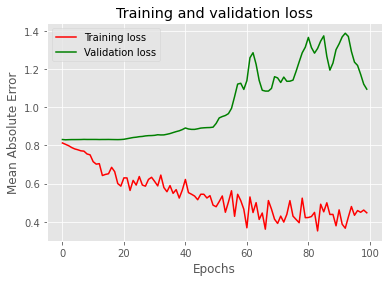

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = history.epoch
plt.figure()
plt.plot(epoch, loss, 'r', label='Training loss')
plt.plot(epoch, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()